In [2]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

G = nx.Graph()
# Array containing ‘user id’ elements, modify the list according to the file Organisation
user_ids = ['0', '107', '348', '414', '686', '698', '1684', '1912', '3437', '3980']
# Read all . edges files to build the graph of social networks all over the world
for user_id in user_ids:
    edges_path = f'../data/facebook/{user_id}.edges'
    edges_df = pd.read_csv(edges_path, sep=' ', header=None, names=['user1', 'user2'])
    G.add_edges_from(edges_df.values)

num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Graph has {num_nodes} nodes and {num_edges} edges.")


Graph has 3959 nodes and 84243 edges.


4.1

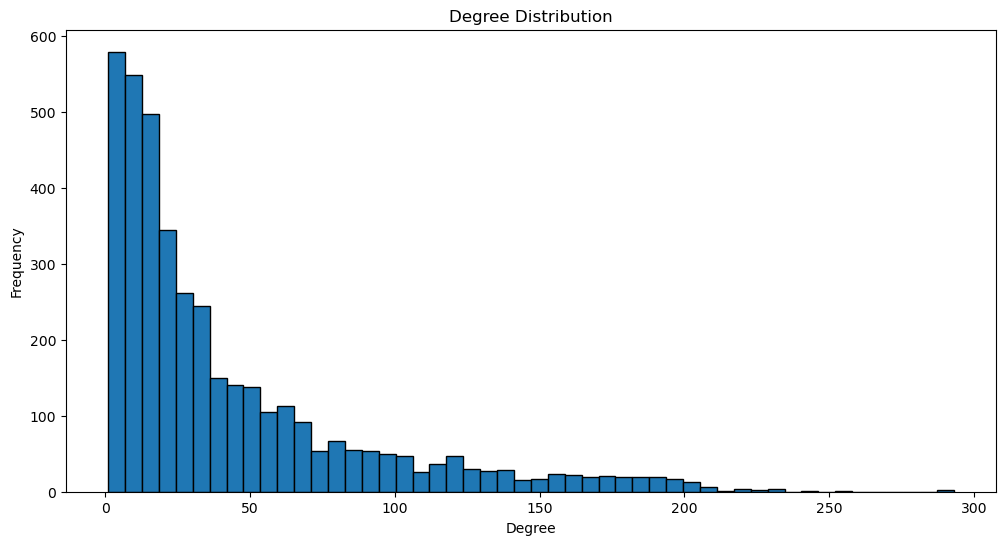

Average Clustering Coefficient: 0.5437268365614683
Graph is not connected. Cannot calculate average path length.
Number of Connected Components: 13


In [4]:
# Calculate degree distribution
degree_distribution = [d for n, d in G.degree()]
plt.figure(figsize=(12, 6))
plt.hist(degree_distribution, bins=50, edgecolor='k')
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.show()
# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)
print(f'Average Clustering Coefficient: {clustering_coefficient}')
# Average Path Length
if nx.is_connected(G):
    average_path_length = nx.average_shortest_path_length(G)
    print(f'Average Path Length: {average_path_length}')
else:
    print('Graph is not connected. Cannot calculate average path length.')
# Find out the number of connected subgraphs
num_connected_components = nx.number_connected_components(G)
print(f'Number of Connected Components: {num_connected_components}')


In [5]:
# Perform degree centrality and get the top 10 nodes with the highest degree centrality
degree_centrality = nx.degree_centrality(G)
sorted_degree_centrality = sorted(degree_centrality.items(), key=lambda item: item[1], reverse=True)
super_nodes = sorted_degree_centrality[:10]  

print('Top 10 nodes by degree centrality:')
for node, centrality in super_nodes:
    print(f'Node {node} with degree centrality {centrality:.4f}')

Top 10 nodes by degree centrality:
Node 2543 with degree centrality 0.0740
Node 2347 with degree centrality 0.0733
Node 1888 with degree centrality 0.0639
Node 1800 with degree centrality 0.0616
Node 1663 with degree centrality 0.0591
Node 1352 with degree centrality 0.0589
Node 2266 with degree centrality 0.0589
Node 483 with degree centrality 0.0584
Node 1730 with degree centrality 0.0568
Node 1985 with degree centrality 0.0563


4.3

Top 10 users by degree centrality:
      Degree Centrality  Betweenness Centrality  Closeness Centrality
2543           0.074027                0.044374              0.239661
2347           0.073269                0.014075              0.220938
1888           0.063921                0.001429              0.247286
1800           0.061647                0.001456              0.250547
1663           0.059121                0.004362              0.262540
1352           0.058868                0.004888              0.263037
2266           0.058868                0.007084              0.211806
483            0.058363                0.039944              0.246784
1730           0.056847                0.001365              0.249360
1985           0.056342                0.001051              0.199012
Top 10 users by betweenness centrality:
      Degree Centrality  Betweenness Centrality  Closeness Centrality
1085           0.016170                0.249170              0.256843
1718           

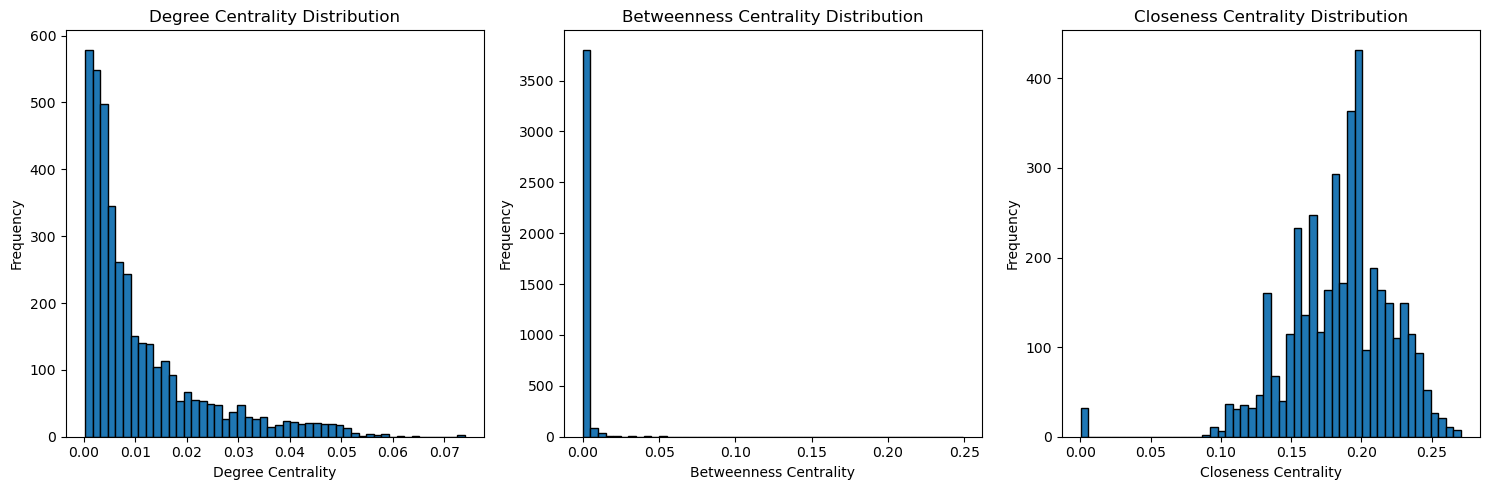

In [6]:
# Calculate user centrality measures
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
# Combine centrality metrics to a DataFrame
centrality_df = pd.DataFrame({
    'Degree Centrality': pd.Series(degree_centrality),
    'Betweenness Centrality': pd.Series(betweenness_centrality),
    'Closeness Centrality': pd.Series(closeness_centrality)
})
# Users with the highest degree centrality
top_degree_users = centrality_df.nlargest(10, 'Degree Centrality')
print("Top 10 users by degree centrality:")
print(top_degree_users)
# Users with the highest betweenness centrality
top_betweenness_users = centrality_df.nlargest(10, 'Betweenness Centrality')
print("Top 10 users by betweenness centrality:")
print(top_betweenness_users)
# Users with the highest closeness centrality
top_closeness_users = centrality_df.nlargest(10, 'Closeness Centrality')
print("Top 10 users by closeness centrality:")
print(top_closeness_users)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(degree_centrality.values(), bins=50, edgecolor='k')
plt.title('Degree Centrality Distribution')
plt.xlabel('Degree Centrality')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(betweenness_centrality.values(), bins=50, edgecolor='k')
plt.title('Betweenness Centrality Distribution')
plt.xlabel('Betweenness Centrality')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(closeness_centrality.values(), bins=50, edgecolor='k')
plt.title('Closeness Centrality Distribution')
plt.xlabel('Closeness Centrality')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


4.2

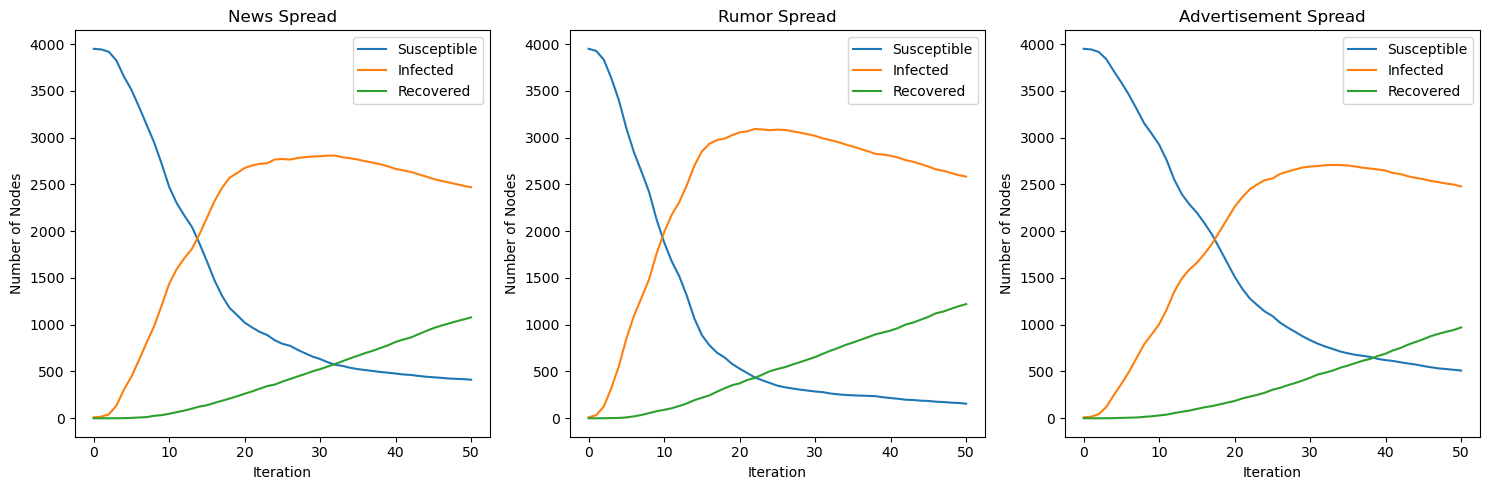

In [8]:
import random

def sir_model(G, initial_infected, beta, gamma, max_iter):
    status = {node: 'S' for node in G.nodes()}
    for node in initial_infected:
        status[node] = 'I'

    results = {'S': [len([n for n in status if status[n] == 'S'])],
               'I': [len([n for n in status if status[n] == 'I'])],
               'R': [0]}

    for _ in range(max_iter):
        new_status = status.copy()
        for node in G.nodes():
            if status[node] == 'I':
                for neighbor in G.neighbors(node):
                    if status[neighbor] == 'S' and random.random() < beta:
                        new_status[neighbor] = 'I'
                if random.random() < gamma:
                    new_status[node] = 'R'
        status = new_status
        results['S'].append(len([n for n in status if status[n] == 'S']))
        results['I'].append(len([n for n in status if status[n] == 'I']))
        results['R'].append(len([n for n in status if status[n] == 'R']))
        
        if results['I'][-1] == 0:
            break

    return results

initial_infected = random.sample(list(G.nodes()), 10) 
beta = 0.03 
gamma = 0.01  
max_iter = 50  

results_news = sir_model(G, initial_infected, beta, gamma, max_iter)

beta_rumor = 0.05  
results_rumor = sir_model(G, initial_infected, beta_rumor, gamma, max_iter)

beta_advertisement = 0.02  
results_advertisement = sir_model(G, initial_infected, beta_advertisement, gamma, max_iter)

plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.plot(results_news['S'], label='Susceptible')
plt.plot(results_news['I'], label='Infected')
plt.plot(results_news['R'], label='Recovered')
plt.title('News Spread')
plt.xlabel('Iteration')
plt.ylabel('Number of Nodes')
plt.legend()

plt.subplot(132)
plt.plot(results_rumor['S'], label='Susceptible')
plt.plot(results_rumor['I'], label='Infected')
plt.plot(results_rumor['R'], label='Recovered')
plt.title('Rumor Spread')
plt.xlabel('Iteration')
plt.ylabel('Number of Nodes')
plt.legend()

plt.subplot(133)
plt.plot(results_advertisement['S'], label='Susceptible')
plt.plot(results_advertisement['I'], label='Infected')
plt.plot(results_advertisement['R'], label='Recovered')
plt.title('Advertisement Spread')
plt.xlabel('Iteration')
plt.ylabel('Number of Nodes')
plt.legend()

plt.tight_layout()
plt.show()